In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

X = pd.read_csv("dataset/X_data.csv").drop(columns=["Unnamed: 0"])
y = pd.read_csv("dataset/y_data.csv").Status.astype("category")

object_columns = X.select_dtypes(include=['object']).columns
X[object_columns] = X[object_columns].astype('category')

int_columns = X.select_dtypes(include=['int64']).columns
X[int_columns] = X[int_columns].astype('float64')

X.Stage = X.Stage.astype("category")

df = pd.concat([X, y], axis=1)

In [2]:
X.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000
mean,1917.782297,50.772727,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731
std,1104.672992,10.442880,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000
min,41.000000,26.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,1092.750000,43.000000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000
50%,1730.000000,51.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000
75%,2613.500000,58.000000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000
max,4795.000000,78.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000


In [3]:
X.describe(include="category")

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage
count,312,418,312,312,312,418,412.0
unique,2,2,2,2,2,3,4.0
top,D-penicillamine,F,N,Y,N,N,3.0
freq,158,374,288,160,222,354,155.0


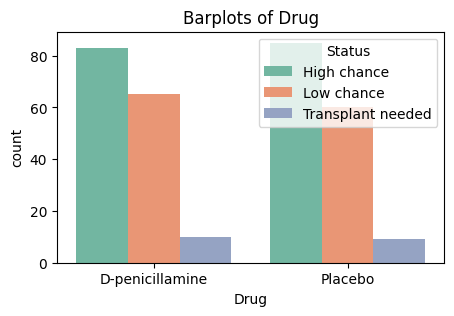

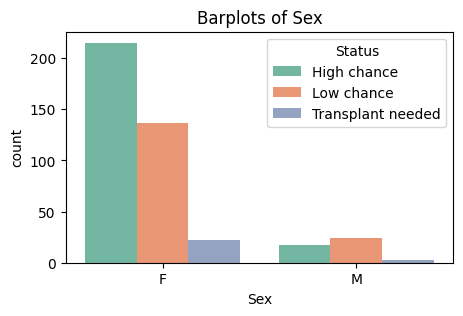

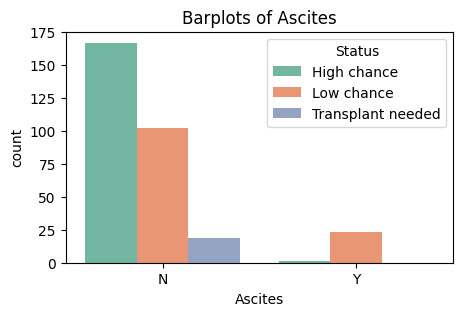

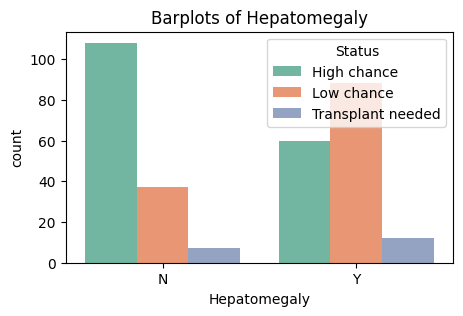

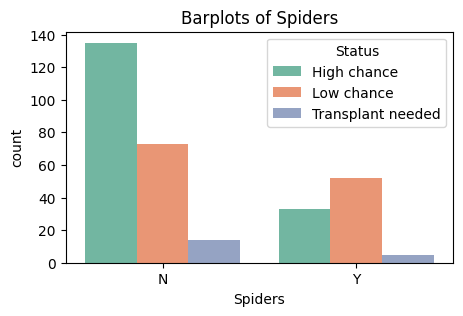

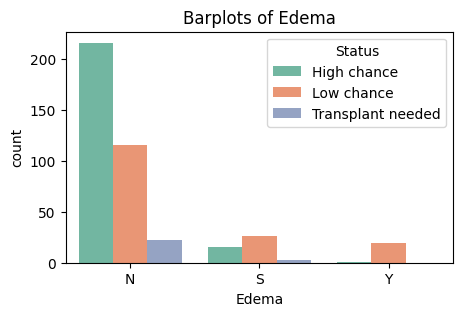

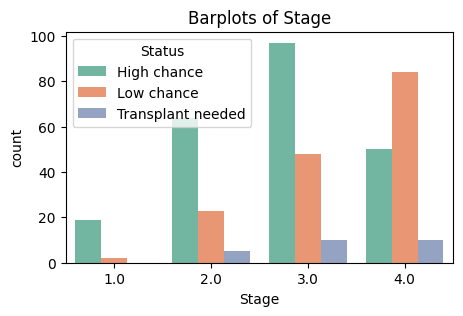

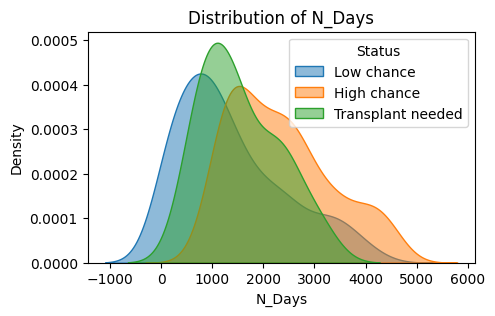

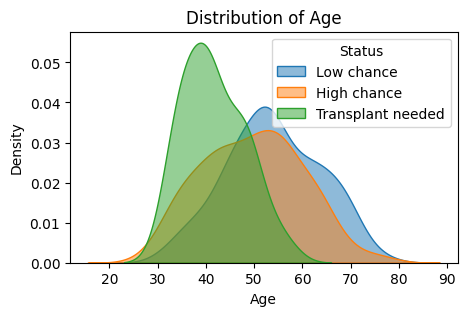

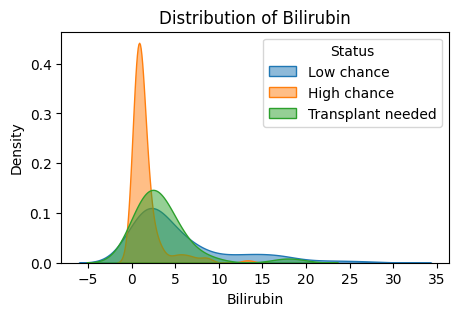

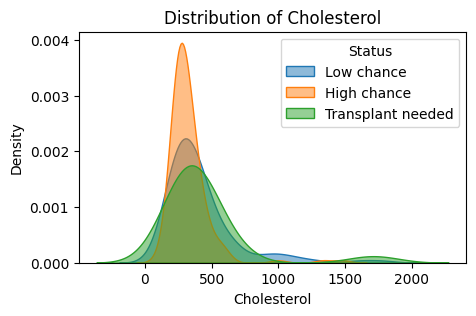

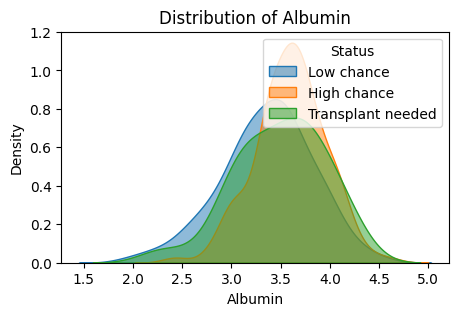

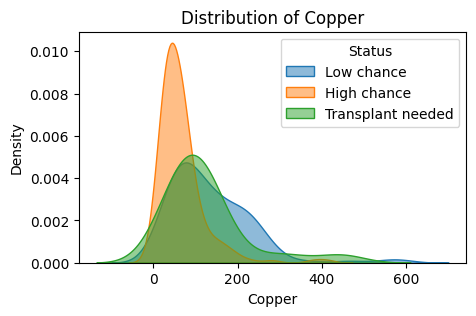

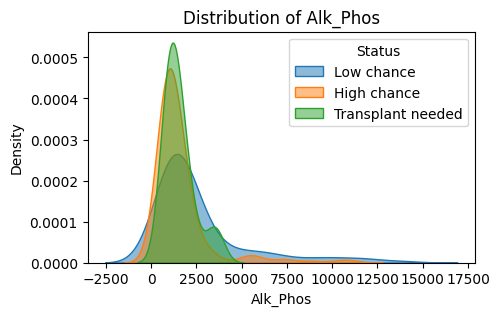

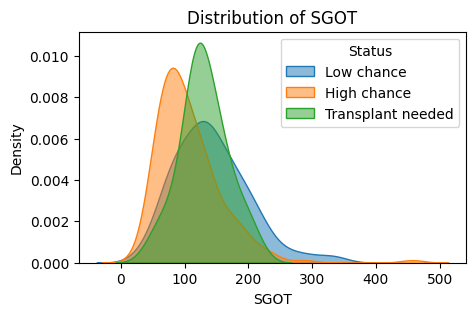

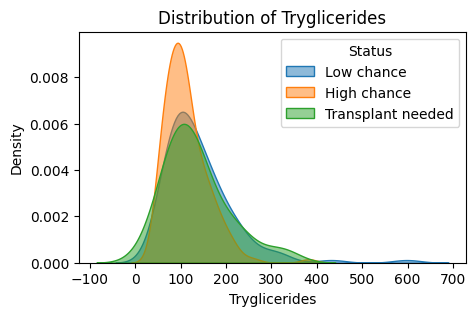

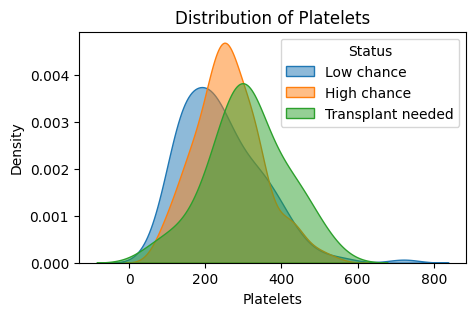

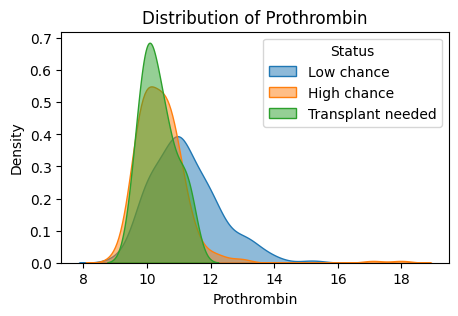

In [4]:
categorical_vars = df.select_dtypes(include=['category']).columns.tolist()
numeric_vars = df.select_dtypes(include=['float64']).columns.tolist()

for var in categorical_vars:
    if var != "Status":
        plt.figure(figsize=(5, 3))
        sns.countplot(x=var, data=df, hue='Status', palette='Set2', dodge=True)
        plt.title(f'Barplots of {var}')
        plt.legend(title='Status')
        plt.show()

for var in numeric_vars:
    plt.figure(figsize=(5, 3))
    for status in df['Status'].unique():
        sns.kdeplot(df[df['Status']==status][var], fill=True, label=status, alpha=0.5)
    plt.title(f'Distribution of {var}')
    plt.legend(title='Status')
    plt.show()

100%|██████████| 19/19 [00:01<00:00, 13.19it/s]


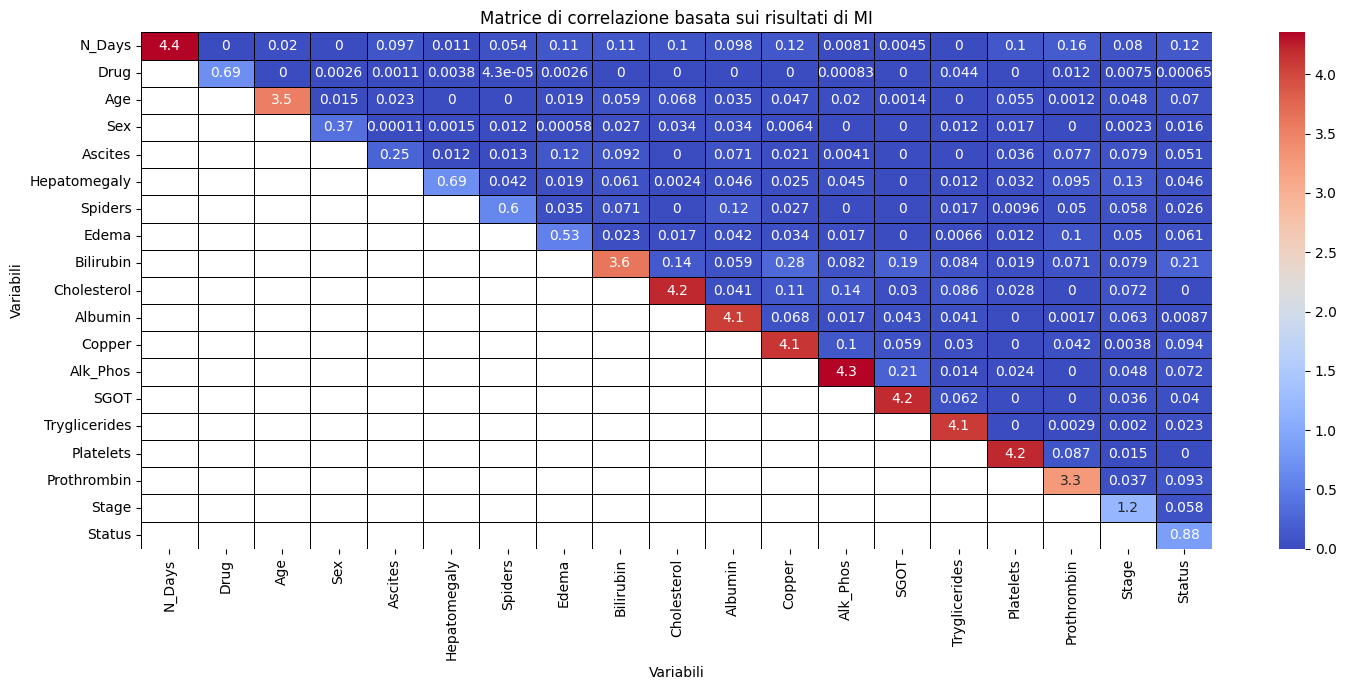

In [5]:
from tqdm import tqdm
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.metrics import mutual_info_score

temp_dataset = df.dropna()

features = temp_dataset.columns.tolist()
correlation_matrix = pd.DataFrame(index=features, columns=features)

# Esegui le MI e riempi la matrice di correlazione
for i in tqdm(range(len(features))):
    for j in range(i, len(features)):
        var1 = features[i]
        var2 = features[j]

        try:
            if temp_dataset[var1].dtype == "float64" and temp_dataset[var2].dtype == "float64":
                mi = mutual_info_regression(temp_dataset[[var1]], temp_dataset[var2], discrete_features=False)
            elif temp_dataset[var1].dtype == "category" and temp_dataset[var2].dtype == "category":
                mi = mutual_info_score(temp_dataset[var1], temp_dataset[var2])
            else:
                if temp_dataset[var1].dtype == "category":
                    mi = mutual_info_classif(temp_dataset[[var2]], temp_dataset[var1])
                else:
                    mi = mutual_info_classif(temp_dataset[[var1]], temp_dataset[var2])
        except Exception as e:
            print(f"Errore durante il calcolo dell'informazione mutua tra {var1} e {var2}: {str(e)}")
            mi = np.nan

        correlation_matrix.loc[var1, var2] = mi
        if i != j:
            correlation_matrix.loc[var2, var2] = mi

correlation_matrix = correlation_matrix.astype(float)

plt.figure(figsize=(15, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')

plt.title('Matrice di correlazione basata sui risultati di MI')
plt.xlabel('Variabili')
plt.ylabel('Variabili')
plt.tight_layout()

plt.show()

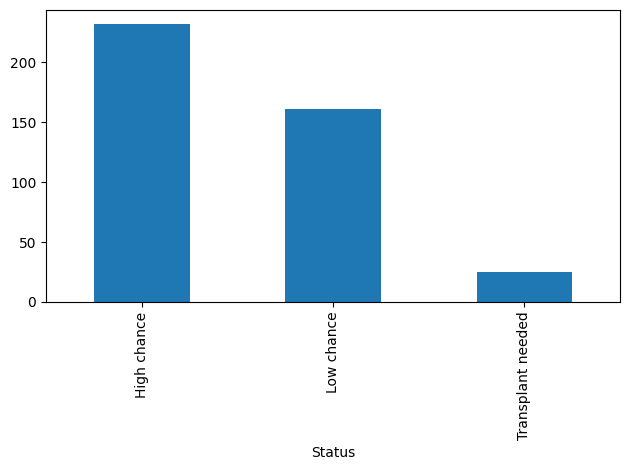

In [6]:
y.value_counts().plot(kind="bar")
plt.tight_layout()
plt.show()

We analyze the boxplots in order to select the best Scaler

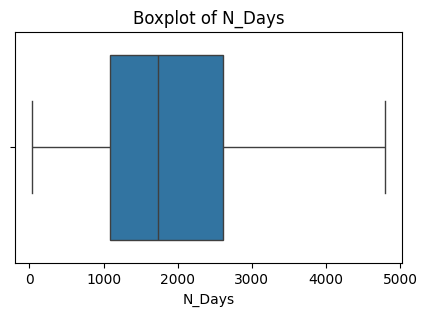

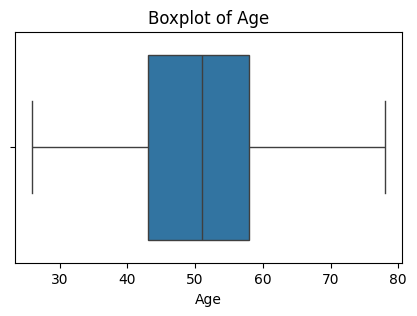

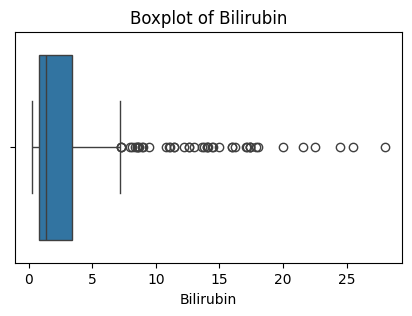

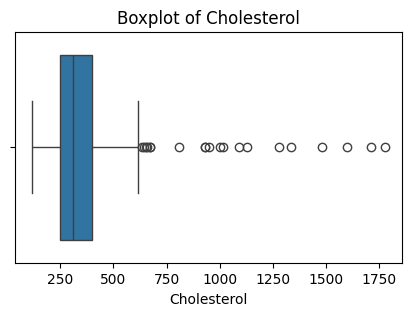

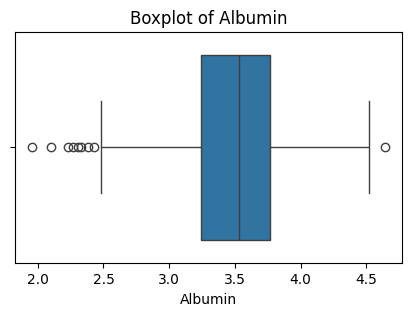

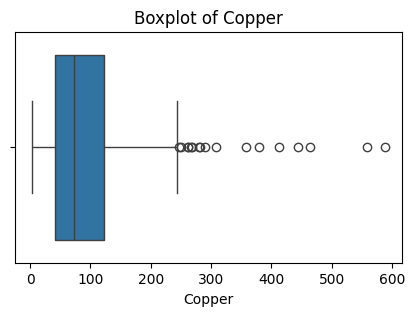

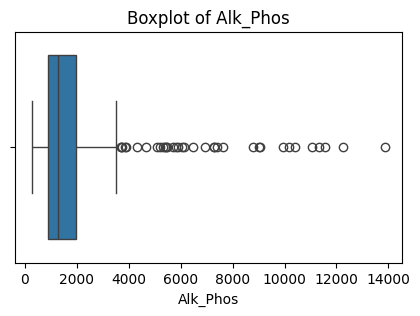

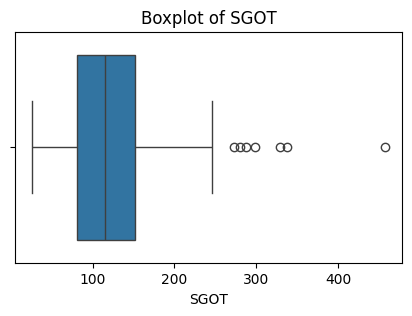

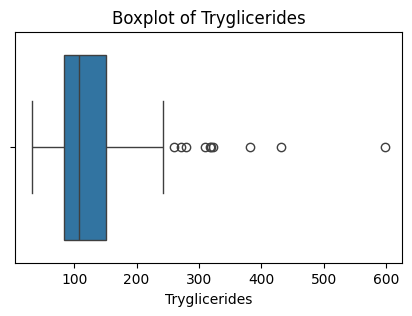

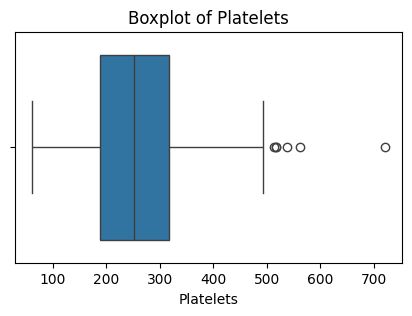

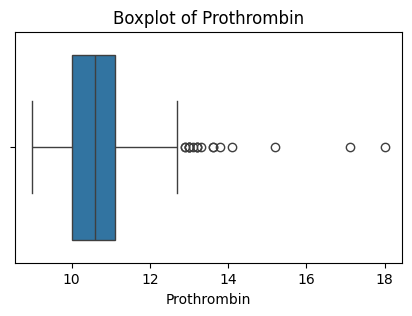

In [7]:
numeric_columns = df.select_dtypes(include=['float64'])

for column in numeric_columns.columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()